In [60]:
%Notebook for polynomial regression
data= load('text49.csv');

X=data(:,1);
m=size(X,1);
y=data(:,2);

p = 8;

% Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p);
[X_poly, mu, sigma] = featureNormalize(X_poly);  % Normalize
X_poly = [ones(m, 1), X_poly];

Iteration   200 | Cost: 5.271337e-01


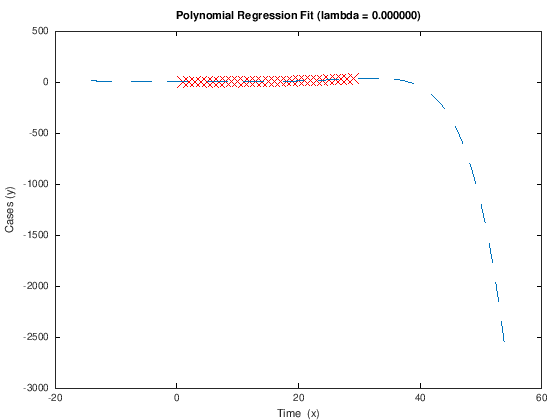

In [61]:
lambda = 0.00;
[theta] = trainLinearReg(X_poly, y, lambda);

% Plot training data and fit
figure(1);
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);
xlabel('Time  (x)');
ylabel('Cases (y)');
title (sprintf('Polynomial Regression Fit (lambda = %f)', lambda));

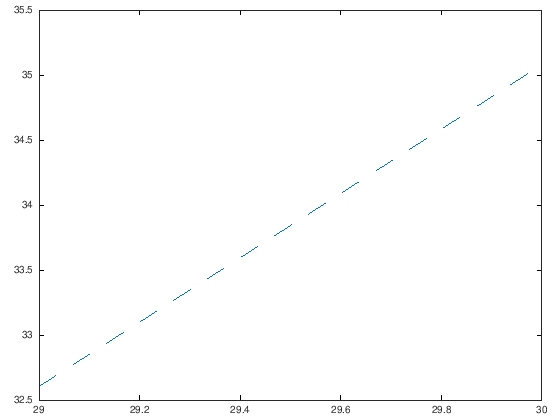

In [63]:
%Fitting up to last data point and predicting value only for the next point.
X_test=[29:30]';
X_poly = polyFeatures(X_test, p);
X_poly = bsxfun(@minus, X_poly, mu);
X_poly = bsxfun(@rdivide, X_poly, sigma);

X_poly = [ones(size(X_test, 1), 1) X_poly];

plot(X_test, X_poly * theta, '--', 'LineWidth', 2)

In [64]:
X_poly*theta

ans =

   32.604
   35.080



In [65]:
y

y =

    1
    1
    1
    1
    1
    1
    1
    2
    2
    2
    2
    4
    5
    5
    6
    6
    6
    8
   10
   11
   11
   16
   16
   16
   24
   25
   28
   28
   33



In [62]:
m

m =  29
